<a href="https://colab.research.google.com/github/kirmel4/QualityRotationClassifierCNN/blob/main/QualityRotationClassifierCNN_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузка датасета с kaggle

In [ ]:
# set up kaggle json in colab and download the dataset
# make sure you downloaded kaggle.json locally from kaggle profile https://www.kaggle.com/YOURDISPLAYNAME/account

! pip install -q kaggle

import os
from google.colab import files

if not os.path.exists("/root/.kaggle/kaggle.json"):
  files.upload()
  ! mkdir -p ~/.kaggle
  ! mv kaggle.json ~/.kaggle/ 
  ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# example downloading dataset
!kaggle datasets download -d kwentar/blur-dataset
!unzip -qq blur-dataset.zip -d ./main

blur-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace ./main/blur_dataset_scaled/defocused_blurred/0_IPHONE-SE_F.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!kaggle datasets download -d kirillmelikhov4/exposed


100% 4.12G/4.12G [03:02<00:00, 25.6MB/s]
100% 4.12G/4.12G [03:02<00:00, 24.2MB/s]


In [ ]:
!unzip -qq exposed -d ./main

In [ ]:
blurred_path = '/content/main/motion_blurred'
sharp_path = '/content/main/sharp'
rotated0_path= '/content/main/sharp'
rotated90_path  = '/content/main/sharp'
rotated180_path = '/content/main/sharp'
rotated270_path = '/content/main/sharp'

In [ ]:
exposed_path = '/content/main/Phos2/Phos2_0_5MP/Phos2_0_5MP'

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
import imutils

In [ ]:
def get_img(path):
  arr = []
  names = os.listdir(path)
  for name in names:
    img = cv2.imread(path+'/'+name)
    img = cv2.resize(img, (200, 200))
    arr.append(img)
  return arr
def get_img_exp(path):
  arr = []
  files = os.listdir(path)
  for file_ in files:
    file_dir = os.listdir(path+'/'+file_)
    for name in file_dir:
      if 'plus_3' in name:
        img = cv2.imread(path+'/'+file_+'/'+name)
        img = cv2.resize(img, (200, 200))
        arr.append(img)
  return arr
def get_img_nonexp(path):
  arr = []
  files = os.listdir(path)
  for file_ in files:
    file_dir = os.listdir(path+'/'+file_)
    for name in file_dir:
      if 'plus_1' in name:
        img = cv2.imread(path+'/'+file_+'/'+name)
        img = cv2.resize(img, (200, 200))
        arr.append(img)
  return arr

In [ ]:
blurred = get_img(blurred_path) 
sharp = get_img(sharp_path)
rotated0 = sharp
rotated90 = sharp
rotated180 = sharp
rotated270 = sharp
exposed = get_img_exp(exposed_path)
nonexposed = get_img_nonexp(exposed_path)

In [ ]:
def augmentate(arr):
  resarr = []
  for img in arr:
    flipped = tf.image.flip_left_right(img)
    saturated = tf.image.adjust_saturation(img, 3)
    resarr.append(img)
  return resarr

In [ ]:
nonexposed = np.array(nonexposed)
exposed = np.array(exposed)

In [ ]:
exposed_a = augmentate(exposed)
nonexposed_a = augmentate(nonexposed)

In [ ]:
exposed_a =  np.array(exposed_a)
nonexposed_a = np.array(nonexposed_a)

In [ ]:
exposed_a.shape

(15, 200, 200, 3)

In [ ]:
def rotate(arr, angle):
  rotated = []
  for img in arr:
    img = imutils.rotate(img, angle=angle)
    rotated.append(img)
  return rotated

rotated90 = rotate(rotated90, 90)
rotated180 = rotate(rotated180, 180)
rotated270 = rotate(rotated270, 270)



In [ ]:
rotated0 = [cv2.bitwise_not(img) for img in rotated0]

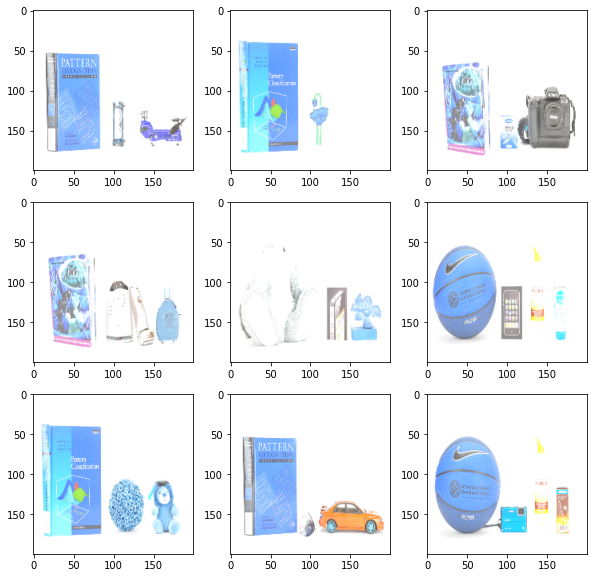

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  axis = plt.subplot(3, 3, i+1)
  plt.imshow(exposed[i])

In [ ]:
y_train = pd.DataFrame(columns = ['sharp_feature', 'blurred_feature', 'rotated0', 'rotated90', 'rotated180', 'rotated270', 'exposed', 'nonexposed','bgr','rgb'])


In [ ]:
for i in range(4320):
    y_train = y_train.append({ 'sharp_feature' : 0, 'blurred_feature' :0, 'rotated0' : 0, 'rotated90':0, 'rotated180': 0, 'rotated270':0, 'exposed':0, 'nonexposed':0} , ignore_index=True)

In [ ]:
y_train.head()

,sharp_feature,blurred_feature,rotated0,rotated90,rotated180,rotated270,exposed,nonexposed,bgr,rgb
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in range(350):
  y_train.sharp_feature[i] = 1

In [ ]:
for i in range(350, 700):
  y_train.blurred_feature[i] = 1

In [ ]:
for i in range(700, 1050):
  y_train.rotated0[i] = 1

In [ ]:
for i in range(1050, 1400):
  y_train.rotated90[i] = 1

In [ ]:
for i in range(1400, 1750):
  y_train.rotated180[i] = 1

In [ ]:
for i in range(1750, 2100 ):
  y_train.rotated270[i] = 1
  

In [ ]:
for i in range(2100, 2130 ):
  y_train.exposed[i] = 1

In [ ]:
for i in range(2130, 2160 ):
  y_train.nonexposed[i] = 1

In [ ]:
for i in range(2160):
  y_train.bgr[i] = 1
for i in range(2160,4320):
  y_train.rgb[i] = 1

In [ ]:
labels = y_train

In [ ]:
labels.shape

(2100, 6)

In [ ]:
images = np.concatenate((sharp, blurred)) #/255.
rotated_images = np.concatenate((rotated0, rotated90, rotated180, rotated270))# /255.
exposed_images = np.concatenate((exposed, exposed_a, nonexposed, nonexposed_a)) #/255.

In [ ]:
final_dataset = np.concatenate((images, rotated_images, exposed_images))


In [ ]:
final_dataset.shape

(2160, 200, 200, 3)

In [ ]:
final_dataset[5]

In [ ]:
cvt_dataset = []
i = 0
for img in final_dataset:
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  cvt_dataset.append(img)



In [ ]:
cvt_dataset = np.array(cvt_dataset)

In [ ]:
cvt_dataset.shape

(2160, 200, 200, 3)

In [ ]:
final_dataset.shape

(2160, 200, 200, 3)

In [ ]:
dataset = np.concatenate((final_dataset, cvt_dataset)) /255.

In [ ]:
dataset.shape

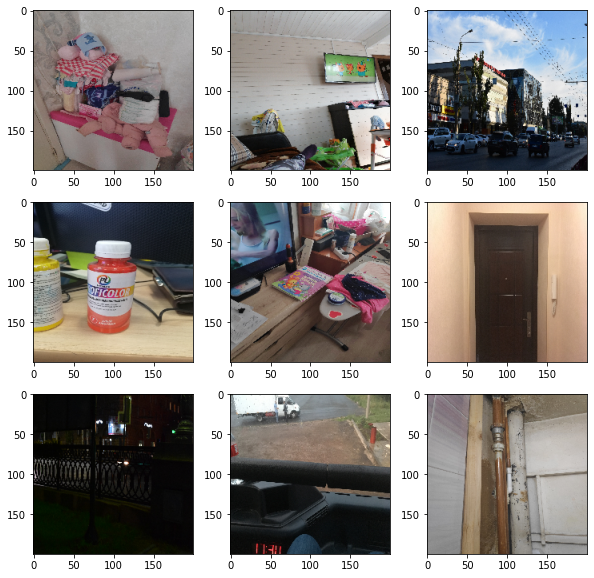

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  axis = plt.subplot(3, 3, i+1)
  plt.imshow(cvt_dataset[i])

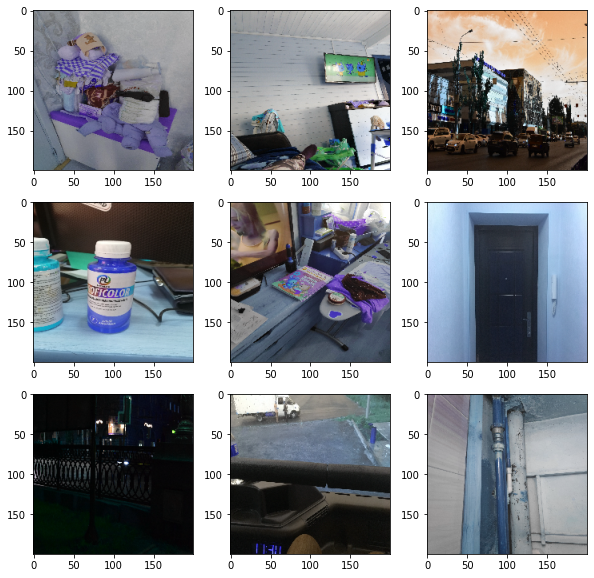

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  axis = plt.subplot(3, 3, i+1)
  plt.imshow(final_dataset[i])

In [ ]:
dataset.shape

(2160, 200, 200, 3)

In [ ]:
dataset = np.asarray(dataset).astype('float32')
labels = np.asarray(labels).astype('float32')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(dataset,labels, test_size = 0.15, random_state=42) 

In [ ]:
import keras
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf

#Модель

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (200,200, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.fit(X_train, y_train, epochs = 20, validation_data = (X_val,y_val))

Epoch 1/20
115/115 [==============================] - 14s 43ms/step - loss: 0.3074 - accuracy: 0.3205 - val_loss: 0.2715 - val_accuracy: 0.3549
Epoch 2/20
115/115 [==============================] - 4s 35ms/step - loss: 0.2263 - accuracy: 0.3927 - val_loss: 0.2265 - val_accuracy: 0.4213
Epoch 3/20
115/115 [==============================] - 5s 42ms/step - loss: 0.1769 - accuracy: 0.4954 - val_loss: 0.2021 - val_accuracy: 0.3858
Epoch 4/20
115/115 [==============================] - 4s 36ms/step - loss: 0.1448 - accuracy: 0.5528 - val_loss: 0.2102 - val_accuracy: 0.4414
Epoch 5/20
115/115 [==============================] - 4s 35ms/step - loss: 0.1211 - accuracy: 0.5904 - val_loss: 0.2472 - val_accuracy: 0.4537
Epoch 6/20
115/115 [==============================] - 4s 35ms/step - loss: 0.0906 - accuracy: 0.6487 - val_loss: 0.2453 - val_accuracy: 0.2577
Epoch 7/20
115/115 [==============================] - 4s 38ms/step - loss: 0.0654 - accuracy: 0.6893 - val_loss: 0.2875 - val_accuracy: 0.339

In [ ]:
predictions = model.predict(X_val[100:109])


1/1 [==============================] - 0s 65ms/step


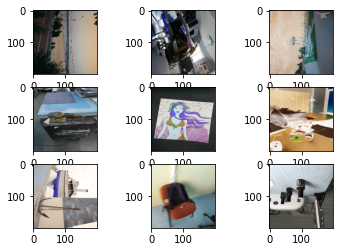

In [ ]:
x = X_val[100:109]
for i in range(9):
  axis = plt.subplot(3, 3, i+1)
  plt.imshow(x[i])
  

In [ ]:
labels_ = ['sharp_feature', 'blurred_feature', 'rotated0', 'rotated90', 'rotated180', 'rotated270', 'exposed', 'nonexposed', 'bgr', 'rgb']

In [ ]:
dictionary = []
for i in range(len(predictions)):
  dictionary.append(dict(zip(labels_, predictions[i])))

In [ ]:
dictionary

[{'sharp_feature': 4.1532962e-06,
  'blurred_feature': 4.232598e-11,
  'rotated0': 2.5454305e-05,
  'rotated90': 6.97252e-11,
  'rotated180': 9.130467e-07,
  'rotated270': 0.9999695,
  'exposed': 7.559614e-21,
  'nonexposed': 3.915069e-13},
 {'sharp_feature': 4.890939e-13,
  'blurred_feature': 1.3669426e-22,
  'rotated0': 1.2830971e-12,
  'rotated90': 3.50308e-16,
  'rotated180': 3.9613948e-08,
  'rotated270': 1.0,
  'exposed': 0.0,
  'nonexposed': 3.1608516e-21},
 {'sharp_feature': 2.1338642e-15,
  'blurred_feature': 6.6202454e-16,
  'rotated0': 5.0842847e-18,
  'rotated90': 1.0,
  'rotated180': 9.070633e-11,
  'rotated270': 1.4039457e-23,
  'exposed': 5.9302653e-27,
  'nonexposed': 6.589443e-20},
 {'sharp_feature': 0.7541926,
  'blurred_feature': 0.02735605,
  'rotated0': 0.00023297724,
  'rotated90': 0.2113149,
  'rotated180': 0.006608602,
  'rotated270': 0.00029081176,
  'exposed': 2.3834515e-16,
  'nonexposed': 4.1802896e-06},
 {'sharp_feature': 1.1412019e-09,
  'blurred_feature':

In [ ]:
def get_key(d, value):
    for k, v in d.items():
        if v == value:
            return k

In [ ]:
for pred in dictionary:
  print(max(pred['sharp_feature'], pred['blurred_feature']))
  print(get_key(pred, max(pred['sharp_feature'], pred['blurred_feature'])))
  print(max(pred['rotated0'], pred['rotated90'], pred['rotated180'], pred['rotated270']))
  print(get_key(pred, max(pred['rotated0'], pred['rotated90'], pred['rotated180'], pred['rotated270'])))
  print(max(pred['exposed'], pred['nonexposed']))
  print(get_key(pred, max(pred['exposed'], pred['nonexposed'])))
  print(max(pred['bgr'], pred['rgb']))
  print(get_key(pred, max(pred['bgr'], pred['rgb'])),'\n')

0.0007745215
sharp_feature
0.9982374
rotated270
8.8610055e-14
nonexposed 

0.00010554565
sharp_feature
0.8930403
rotated270
9.267717e-20
nonexposed 

1.3351035e-08
blurred_feature
0.9999999
rotated90
2.56877e-13
nonexposed 

0.019572223
sharp_feature
0.002793614
rotated90
1.6792325e-12
nonexposed 

0.02698386
blurred_feature
0.00020741622
rotated0
1.5110186e-16
nonexposed 

2.1850286e-09
blurred_feature
0.9999999
rotated0
1.0284901e-14
nonexposed 

5.013286e-14
blurred_feature
0.99999964
rotated270
2.2731833e-17
exposed 

0.97998273
blurred_feature
0.00020177901
rotated0
3.4421508e-09
exposed 

7.1276197e-16
blurred_feature
1.0
rotated180
2.824375e-17
nonexposed 



# Пример датасета 
https://www.kaggle.com/kwentar/blur-dataset









































































































# Контакты

Вопросы можно задать в 
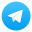


@JI_411

@dragynir


Удачи в выполнении задания!

In [ ]:
#Спасибо